# Vibroseis data

**[Download the data from source](http://www.geofizyka.pl/2D_Land_vibro_data_2ms.tgz) or from [Agile's S3 bucket](	
https://s3.amazonaws.com/agilegeo/2D_Land_vibro_data_2ms.tgz).**

This prestack 2D land Vibroseis dataset was donated to the public domain by [Geofizyka Torun, Poland](http://www.geofizyka.pl/).

More info about this line:

- Info about this line [on SEG Wiki](http://wiki.seg.org/wiki/2D_Vibroseis_Line_001). 
- A [Madagascar tutorial](http://ahay.org/wikilocal/docs/school10.pdf) using this line, by Yang Liu.
- A [FreeUSP tutorial](http://www.freeusp.org/RaceCarWebsite/TechTransfer/Tutorials/Processing_2D/Processing_2D.html) using this line, by Paul Garossino.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import obspy
obspy.__version__

'1.0.2'

In [3]:
ls -l ../data/poland

total 869576
-rw-r--r--@ 1 matt  staff      64962 18 Feb  2005 Line_001.RPS
-rw-r--r--@ 1 matt  staff      21951 18 Feb  2005 Line_001.SPS
-rw-r--r--@ 1 matt  staff        841 14 Sep 02:26 Line_001.TXT
-rw-r--r--@ 1 matt  staff      21951 18 Feb  2005 Line_001.XPS
-rw-r--r--@ 1 matt  staff  445100896 18 Feb  2005 Line_001.sgy


We'll use this helper function later.

In [4]:
def view_header(string, width=80):
    try:
        # Make sure we don't have a ``bytes`` object.
        string = string.decode()
    except:
        # String is already a string, carry on.
        pass
    lines = int(np.ceil(len(string) / width))
    result = ''
    for i in range(lines):
        line = string[i*width:i*width+width]
        result += line + (width-len(line))*' ' + '\n'
    print(result)
    return

## Load data

In [5]:
filename = '../data/poland/Line_001.sgy'

In [6]:
from obspy.io.segy.segy import _read_segy
section = _read_segy(filename)

The file-wide header:

In [7]:
view_header(section.textual_file_header)

C 1 CLIENT                        COMPANY                       CREW NO         
C 2 LINE:  LINE_001           AREA                        MAP ID                
C 3 REEL NO           DAY-START OF REEL     YEAR      OBSERVER                  
C 4 INSTRUMENT: MFG            MODEL            SERIAL NO                       
C 5 DATA TRACES/RECORD: 282  AUXILIARY TRACES/RECORD:  2    CDP FOLD            
C 6 SAMPLE INTERNAL:  4MS     SAMPLES/TRACE: 750  BITS/IN      BYTES/SAMPLE 4   
C 7 RECORDING FORMAT        FORMAT THIS REEL: SEGY   MEASUREMENT SYSTEM         
C 8 SAMPLE CODE: FLOATING PT     FIXED PT     FIXED PT-GAIN     CORRELATED      
C 9 GAIN  TYPE: FIXED     BINARY     FLOATING POINT     OTHER                   
C10 FILTERS: ALIAS     HZ  NOTCH     HZ  BAND    -     HZ  SLOPE    -    DB/OCT 
C11 SOURCE: TYPE            NUMBER/POINT        POINT INTERVAL                  
C12     PATTERN:                           LENGTH        WIDTH                  
C13 SWEEP: START     HZ  END

The import line is this:

    C 5 DATA TRACES/RECORD: 282  AUXILIARY TRACES/RECORD:  2    CDP FOLD            

There are 282 data traces, plus 2 auxilliary traces, so a total of **284 traces in each record**.

Let's also check a trace header:

In [8]:
section.traces[3].header

trace_sequence_number_within_line: 4
trace_sequence_number_within_segy_file: 4
original_field_record_number: 231
trace_number_within_the_original_field_record: 2
energy_source_point_number: 32
ensemble_number: 0
trace_number_within_the_ensemble: 4
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 1
data_use: 0
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 0
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: -10000
scalar_to_be_applied_to_all_coordinates: -10000
source_coordinate_x: 0
source_coordinate_y: 0
group_coordinate_x: 0
group_coordinate_y: 0
coordinate_units: 3
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_at_source_in_ms: 0
uphole_time_

There's also a readme file:

In [9]:
!cat ../data/poland/Line_001.TXT

LINE_001

This data is public domain 

Nominal Receiver Station Interval :  25.00
Nominal Source Station Interval...:  50.00
First SP Station Number...........:    701
Last SP Station Number............:   1201
First Live Station Number.........:    561
Last Live Station Number..........:   1342
Original Reference Level..........:      0
Reference Velocity................: 1900.0 
Source Skid0 .....................:  12.50
Source........................... : VIBROSEIS 
Sweep type........................: UP +3db/oct
Sweep freq........................: 8Hz-95Hz
Sweep length......................: 15
Taper,length start,end............: Cosine,0.3sec,0.5sec
Geophone type.....................: SM-4
Geophone freq ....................: 10Hz    
No of geophones per group.........: 24
Geophone array....................: 25m (linear) 





This might be useful, but remember not to believe anything you read.

## Explore and organize the data

First we'll collect the traces and reshape them into a volume.

In [10]:
raw = np.vstack([t.data for t in section.traces])

In [11]:
raw.shape

(71284, 1501)

First 1000 traces:

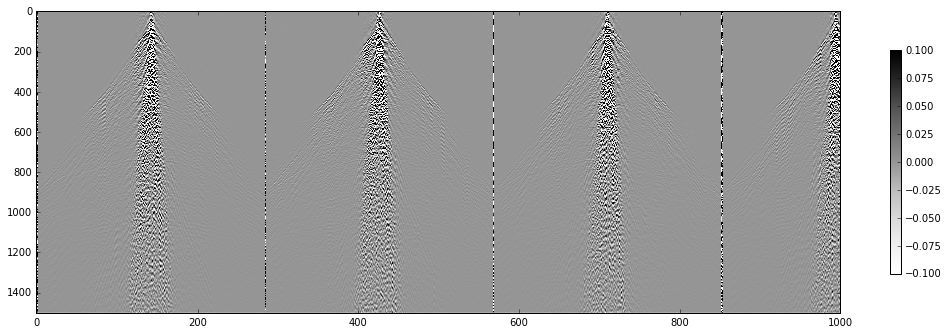

In [12]:
plt.figure(figsize=(18,8))
plt.imshow(raw[:1000, :].T, cmap="Greys", vmin=-.1, vmax=.1, aspect=0.25, interpolation='none')
plt.colorbar(shrink=0.5)
plt.show()

Recall that there are 284 traces (282 + 2 auxilliary) per ensemble.

In [13]:
data = raw.reshape((251, 284, 1501))

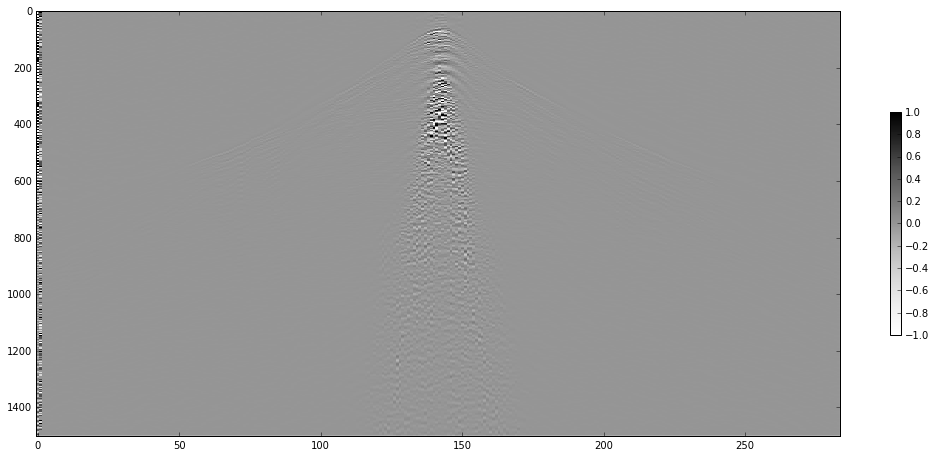

In [14]:
plt.figure(figsize=(18,8))
plt.imshow(data[90, :, :].T, cmap="Greys", vmin=-1, vmax=1, aspect=0.1, interpolation='none')
plt.colorbar(shrink=0.5)
plt.show()

There are two special data traces at the start of each ensemble. Let's pull those out so we have 'pure' gathers.

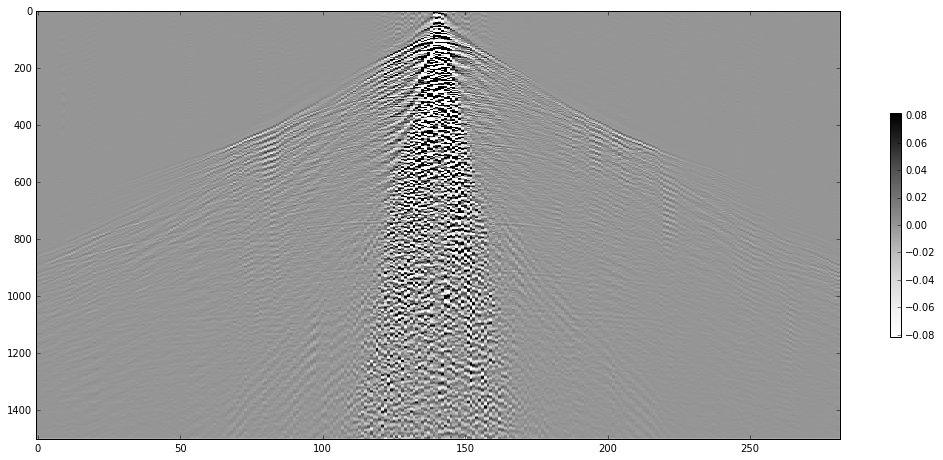

In [15]:
gathers = data[:, 2:, :]

vm = np.percentile(gathers, 99)

plt.figure(figsize=(18,8))
plt.imshow(gathers[0, :, :].T, cmap="Greys", vmin=-vm, vmax=vm, aspect=0.1, interpolation='none')
plt.colorbar(shrink=0.5)
plt.show()

Let's go back and look at that zeroth trace — we'll just look at the one on the 91st gather:

In [16]:
t90 = data[0,:,:]

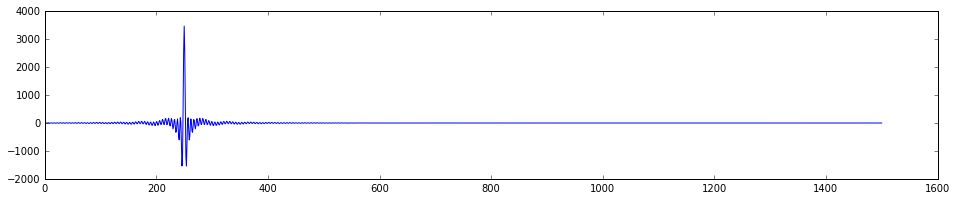

In [17]:
plt.figure(figsize=(16,3))
plt.plot(t90[0,:])
plt.show()

## Source and receiver positions

Let's look at the source and receiver data.

In [18]:
!head -25 ../data/poland/Line_001.RPS

H26                                                                             
H26      Relation Record Specification                                          
H26                                                                             
H26 DEFINITION OF FIELD            COLS       FORMAT       UNIT                 
H26 Record identification          1- 1           A1       none                 
H26 Line name (l adj)              2-17          4A4       none                 
H26 Point number (right adj)      18-25          2A4       none                 
H26 Point index                   26-26           I1       none                 
H26 Point code                    27-28           A2       none                 
H26 Static correction             29-32           I4       Msec                 
H26 Point depth                   33-36          F4.1      Metre                
H26 Seismic datum                 37-40           I4       Metre                
H26 Uphole time             

The obvious way to load this sort of data is `pandas`...

In [19]:
names = ['Record', 'Point', 'Static', 'Easting', 'Northing', 'Elevation']
cols = [0, 1, 2, 7, 8, 9]

In [20]:
import pandas

rcv = pandas.read_csv('../data/poland/Line_001.RPS',
                      delim_whitespace=True,
                      skiprows=20,
                      usecols=cols,
                      names=names,
                     )

In [21]:
rcv.head()

,Record,Point,Static,Easting,Northing,Elevation
0,RLINE_001,5611G1,-48,684590.2,3837867.6,41.0
1,RLINE_001,5621G1,-48,684615.0,3837871.3,41.0
2,RLINE_001,5631G1,-48,684639.8,3837874.9,41.0
3,RLINE_001,5641G1,-48,684664.5,3837878.6,41.0
4,RLINE_001,5651G1,-49,684689.3,3837882.3,42.0


In [22]:
rcv.describe()

,Static,Easting,Northing,Elevation
count,782.000000,782.000000,7.820000e+02,782.000000
mean,-47.942455,694240.122123,3.839381e+06,47.881074
std,3.389826,5566.270917,9.568673e+02,4.638527
min,-58.000000,684590.200000,3.837868e+06,41.000000
25%,-50.000000,689425.175000,3.838587e+06,45.000000
50%,-48.000000,694263.150000,3.839267e+06,47.000000
75%,-46.000000,699061.800000,3.840151e+06,49.000000
max,-41.000000,703807.700000,3.841277e+06,73.000000


Hopefully the source data is the same...

In [23]:
!head -25 ../data/poland/Line_001.SPS

H26                                                                             
H26      Relation Record Specification                                          
H26                                                                             
H26 DEFINITION OF FIELD            COLS       FORMAT       UNIT                 
H26 Record identification          1- 1           A1       none                 
H26 Line name (l adj)              2-17          4A4       none                 
H26 Point number (right adj)      18-25          2A4       none                 
H26 Point index                   26-26           I1       none                 
H26 Point code                    27-28           A2       none                 
H26 Static correction             29-32           I4       Msec                 
H26 Point depth                   33-36          F4.1      Metre                
H26 Seismic datum                 37-40           I4       Metre                
H26 Uphole time             

It is!

In [24]:
src = pandas.read_csv('../data/poland/Line_001.SPS',
                      delim_whitespace=True,
                      skiprows=20,
                      usecols=cols,
                      names=names,
                     )

In [25]:
src.head()

,Record,Point,Static,Easting,Northing,Elevation
0,SLINE_001,7011V1,-50,688081.8,3838302.1,46.0
1,SLINE_001,7031V1,-50,688130.6,3838314.5,46.0
2,SLINE_001,7051V1,-51,688180.1,3838321.8,46.0
3,SLINE_001,7071V1,-50,688228.9,3838334.2,45.0
4,SLINE_001,7091V1,-51,688277.7,3838346.5,45.0


Now plot them together.

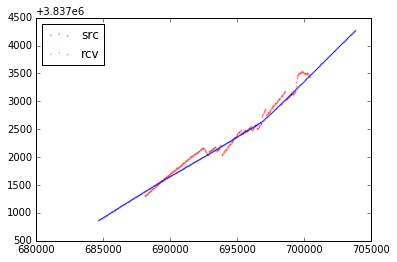

In [26]:
plt.scatter(src.Easting, src.Northing, c='r', lw=0, s=3, alpha=0.5, label='src')
plt.scatter(rcv.Easting, rcv.Northing, c='b', lw=0, s=2, alpha=0.4, label='rcv')
plt.legend(loc=2)
plt.show()

In [27]:
!head -25 ../data/poland/Line_001.XPS

H26                                                                             
H26      Relation Record Specification                                          
H26                                                                             
H26 DEFINITION OF FIELD            COLS       FORMAT       UNIT                 
H26 Record identification          1- 1           A1       none                 
H26 Field tape number (l adj)      2- 7          3A2       none                 
H26 Field record number            8-11           I4       none                 
H26 Field record increment        12-12           I1       none                 
H26 Instrument code               13-13           A1       none                 
H26 Line name (left adj)          14-29          4A4       none                 
H26 Point number (right adj)      30-37          2A4       none                 
H26 Point index                   38-38           I1       none                 
H26 From channel            

## Brute stack

We can stack the traces as they are, without any noise suppression, NMO correction, etc.

In [28]:
gathers.shape

(251, 282, 1501)

In [29]:
brute = np.mean(gathers, axis=1)

In [30]:
vm = np.percentile(brute, 99)

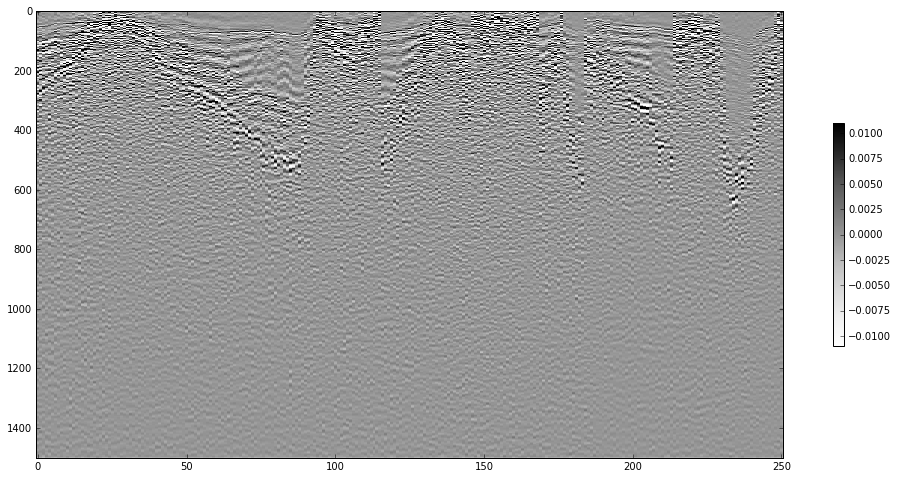

In [31]:
plt.figure(figsize=(18,8))
plt.imshow(brute.T, cmap="Greys", vmin=-vm, vmax=vm, aspect=0.1, interpolation='none')
plt.colorbar(shrink=0.5)
plt.show()

## NMO velocity

From Madagascar velocity scan: https://www.dropbox.com/s/alski0p047ylwu0/Screenshot%202016-09-14%2009.28.40.png?raw=1

Min velocity (blue): 2200 m/s, max velocity (red): 4250 m/s

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>